# Implicit Differentiation


A key numerical operation we do in data analysis is optimization, not only




In [79]:
import jax
import jaxopt
import optax
import numpy as np
import matplotlib.pyplot as plt

hyperparam = np.linspace(-5,5)

def landscape(hyperparam,x):
    xmin = jax.numpy.sin(hyperparam)
    loss = (x-xmin)**2
    return loss

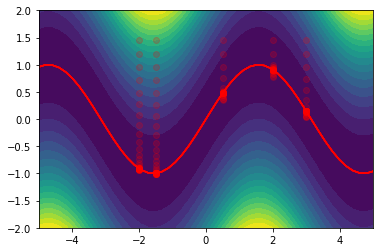

In [134]:
def minimize_at_hyperparam(hyperparam):
    def objective_fun(x):
        return landscape(hyperparam,x)
    solver = jaxopt.OptaxSolver(fun=objective_fun, opt=optax.adam(5e-2), implicit_diff=True)
    x = 1.5
    state = solver.init_state(x)
    trajectory = []
    for i in range(500):
        x, state = solver.update(x, state)
        trajectory.append(x)
    return jax.numpy.array(trajectory)


xspace = np.linspace(-2,2)
hyperparam = np.linspace(-5,5,50)

xmin = jax.numpy.sin(hyperparam)
lvalue = jax.vmap(jax.vmap(landscape, in_axes=(None,0)), in_axes=(0,None))(hyperparam,xspace)
grid = np.meshgrid(hyperparam,xspace,indexing = 'ij')
plt.contourf(grid[0],grid[1],lvalue, levels = 21)

for test_h in [-2.0,-1.5,0.5,2.0,3.0]:
    t2 = minimize_at_hyperparam(test_h)
    plt.scatter(np.ones_like(t2[::5])*test_h,t2[::5], alpha = 0.2, c = 'r')
    plt.plot(hyperparam,xmin,c='r')
    plt.ylim(-2,2)


In [130]:
def diffable_through_opt(hyperparam):
    def objective_fun(x, h):
        return landscape(h,x)
    solver = jaxopt.OptaxSolver(fun=objective_fun, opt=optax.adam(5e-2), implicit_diff=True)
    init_x = 1.0
    xhat = solver.run(init_x, h = hyperparam)
    xhat = xhat.params
    return xhat

hyperparam_for_grad = np.linspace(-5,5,21)
xmin_for_grad = jax.numpy.sin(hyperparam_for_grad)
minimum, gradient = jax.vmap(jax.value_and_grad(diffable_through_opt))(hyperparam_for_grad)

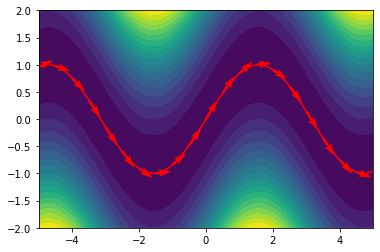

In [132]:
plt.contourf(grid[0],grid[1],lvalue, levels = 21)
plt.plot(hyperparam,xmin, c = 'red')
plt.quiver(hyperparam_for_grad,xmin_for_grad,np.ones_like(gradient),gradient,units='xy',angles='xy', color = 'r')